<!-- <center>
<h2>
Assingment 2
</h2>
</center>

<center>
<h2></h2>
<h3></h3>
<h3></h3>
<h3>
Rasmus Eliasson & Oskar Flodin
</h3>
<img src="bth.png" width="100">

<h5>
    M.Sc. Eng. in AI & Machine Learning <br>
    DIDA, Blekinge Institute of Technology<br>
    Karlskrona, Sweden
</h5>

<mail>rael23@student.bth.se <br>
osfl22@student.bth.se</mail>


<h5>2025-12-12</h5>
</center> -->

<h2 style="text-align:center;">Assignment 2</h2>

<h3 style="text-align:center;">Rasmus Eliasson & Oskar Flodin</h3>

<div style="text-align:center;">
    <img src="bth.png" width="100">
    <h5 style="margin:4px 0; line-height:1.2;">
        M.Sc. Eng. in AI & Machine Learning<br>
        DIDA, Blekinge Institute of Technology
    </h5>
    <h5 style="margin:4px 0;">Karlskrona, Sweden</h5>
    <p style="text-align:center;">
    rael23@student.bth.se<br>
    osfl22@student.bth.se
    </p>
</div>


In [ ]:
#Run to download necessary files to the notebook

# import pathlib
# import os

# data_dir = '/content/rubin_sim_data/'
# pathlib.Path(data_dir).mkdir(parents=True, exist_ok=True)

# files_to_download = {
#     os.path.join(data_dir, "train_full_lightcurves_tutorial.csv"): "11E_Jr1-MBSH9ggddaIEojM9bFgIv7MRE",
#     os.path.join(data_dir, "train_log_tutorial.csv"): "1EfDTTC1NKegbX6jnPqeabH1ShWOmUVE3"}

# for fpath, fid in files_to_download.items():
#     url = f"https://drive.google.com/uc?id={fid}"
#     if not os.path.exists(fpath):
#         print("Fuck!")
#         # print(f"Downloading {os.path.basename(fpath)}...")
#         # !gdown "{url}" -O "{fpath}"
#     else:
#         print(f"{os.path.basename(fpath)} already exists, skipping.")


import os
import pandas as pd
import numpy as np

# os.getcwd()

main_folder = "mallorn-astronomical-classification-challenge"
data_folder = "Data"
path = os.path.join(os.getcwd(), main_folder)
# Path to your main folder

# Get all unique directories
Data_dict = [os.path.join(main_folder, d) for d in os.listdir(main_folder) if os.path.isdir(os.path.join(main_folder, d))]

# print("Unique directories found:")
# for d in Data_dict:
#     print(d)

path = os.path.join(os.getcwd(), main_folder)
path2 = os.path.join(path, 'split_01')
# print(path)
df_split1 = pd.read_csv(os.path.join(path2, "train_full_lightcurves.csv"), sep = ',')

df = df_split1.copy()




In [22]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# !pip install extinction==0.4.7

#Setting filter colours for later plotting
filter_colours = {'u': '#6A5ACD', 'g': '#2ca02c', 'r': '#d62728', 'i': '#ff7f0e', 'z': '#8c564b', 'y': '#1b1b1b'}

In [23]:
#Define name of chosen object
object_ID = 'amon_imloth_luin'

#Creating masks to isolate data for chosen lightcurve and split according to filter
u_mask = ((df['Filter'] == 'u') & (df['object_id'] == object_ID))
g_mask = ((df['Filter'] == 'g') & (df['object_id'] == object_ID))
r_mask = ((df['Filter'] == 'r') & (df['object_id'] == object_ID))
i_mask = ((df['Filter'] == 'i') & (df['object_id'] == object_ID))
z_mask = ((df['Filter'] == 'z') & (df['object_id'] == object_ID))
y_mask = ((df['Filter'] == 'y') & (df['object_id'] == object_ID))

#Saving fluxes, times and error values for the object split according to filter
u_flux = np.array(df.loc[u_mask, 'Flux']); u_time = np.array(df.loc[u_mask, 'Time (MJD)']); u_err = np.array(df.loc[u_mask, 'Flux_err'])
g_flux = np.array(df.loc[g_mask, 'Flux']); g_time = np.array(df.loc[g_mask, 'Time (MJD)']); g_err = np.array(df.loc[g_mask, 'Flux_err'])
r_flux = np.array(df.loc[r_mask, 'Flux']); r_time = np.array(df.loc[r_mask, 'Time (MJD)']); r_err = np.array(df.loc[r_mask, 'Flux_err'])
i_flux = np.array(df.loc[i_mask, 'Flux']); i_time = np.array(df.loc[i_mask, 'Time (MJD)']); i_err = np.array(df.loc[i_mask, 'Flux_err'])
z_flux = np.array(df.loc[z_mask, 'Flux']); z_time = np.array(df.loc[z_mask, 'Time (MJD)']); z_err = np.array(df.loc[z_mask, 'Flux_err'])
y_flux = np.array(df.loc[y_mask, 'Flux']); y_time = np.array(df.loc[y_mask, 'Time (MJD)']); y_err = np.array(df.loc[y_mask, 'Flux_err'])

In [25]:
#Loading in log data file
# log_path = '/content/rubin_sim_data/train_log_tutorial.csv'
log_path = 'train_log.csv'

log_df = pd.read_csv(os.path.join(path, log_path))

#Selecting only the data relevant to the chosen object
object_log = log_df.loc[log_df['object_id'] == object_ID]
print(object_log)

#Defining the redshift of that object
redshift = object_log['Z']

#redshift_err = object_log['Z_err']
#For training set, it is a spectroscopically determined redshift (with negligible error).
#For testing set, it will be a photometrically determined redahift and will have an error value that can be loaded in using the above line.

ebv = object_log['EBV']
#Loading in the extinction coefficient value
#Dust in the Milky Way can obscure the light from a distant object. The amount of extinction is dependent on the position of the object relative to us and the wavelength of light.
#The extinction coefficient (EBV) value is given in the log data to simplify the de-extinction process.

SpecType = object_log['SpecType']
#For the training set, the type of the object will be listed in the 'SpecType' column
#For the testing set, this value will not be present

           object_id       Z  Z_err    EBV SpecType  \
12  amon_imloth_luin  0.7766    NaN  0.055      TDE   

                                  English Translation     split  target  
12  hill, steep-sided mount  +  flowering valley  ...  split_01       1  


In [26]:
#Importing necessary package
from extinction import fitzpatrick99

#Defining function to de-extinct a set of flux values
def jurassic_park (flux, eff_wl):
    A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value
    flux_ext = flux * 10**((A_lambda)/2.5)
    return flux_ext, A_lambda

In [ ]:
#Effective wavelength for each band - sourced from SVO Filter Profile Service
u_eff_wl = np.array([3641]); g_eff_wl = np.array([4704]); r_eff_wl = np.array([6155])
i_eff_wl = np.array([7504]); z_eff_wl = np.array([8695]); y_eff_wl = np.array([10056])

#De-extincting lightcurves
u_flux, u_A_lambda = jurassic_park(u_flux,u_eff_wl); g_flux, g_A_lambda = jurassic_park(g_flux,g_eff_wl)
r_flux, r_A_lambda = jurassic_park(r_flux,r_eff_wl); i_flux, i_A_lambda = jurassic_park(i_flux,i_eff_wl)
z_flux, z_A_lumbda = jurassic_park(z_flux,z_eff_wl); y_flux, y_A_lambda = jurassic_park(y_flux,y_eff_wl)

print(f'u band extinction = {u_A_lambda}'); print(f'g band extinction = {g_A_lambda}'); print(f'r band extinction = {r_A_lambda}')
print(f'i band extinction = {i_A_lambda}'); print(f'z band extinction = {z_A_lumbda}'); print(f'y band extinction = {y_A_lambda}')

u band extinction = [0.26116086]
g band extinction = [0.20746283]
r band extinction = [0.14256113]
i band extinction = [0.1049135]
z band extinction = [0.08188936]
y band extinction = [0.06363456]


C:\Users\rasmu\AppData\Local\Temp\ipykernel_8676\3944608380.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  A_lambda = fitzpatrick99(eff_wl, ebv * 3.1) #3.1 = Standard Milky Way value


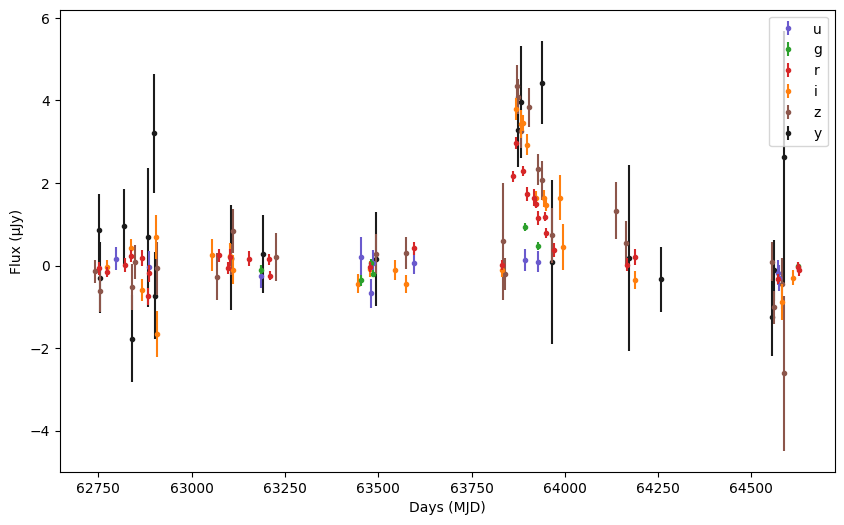

In [28]:
plt.figure(figsize = [10,6])
plt.errorbar(u_time,u_flux, yerr= u_err,label='u', fmt = '.',color = filter_colours['u'],zorder=4)
plt.errorbar(g_time,g_flux,yerr=g_err, label='g', fmt = '.', color = filter_colours['g'],zorder=5)
plt.errorbar(r_time,r_flux,yerr = r_err, label='r', fmt = '.', color = filter_colours['r'],zorder=6)
plt.errorbar(i_time,i_flux,yerr = i_err, label='i', fmt = '.', color = filter_colours['i'],zorder=3)
plt.errorbar(z_time,z_flux,yerr = z_err, label='z', fmt = '.', color = filter_colours['z'],zorder=2)
plt.errorbar(y_time,y_flux,yerr = y_err, label='y', fmt = '.', color = filter_colours['y'],zorder=1)
plt.xlabel('Days (MJD)')
plt.ylabel('Flux (μJy)')
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

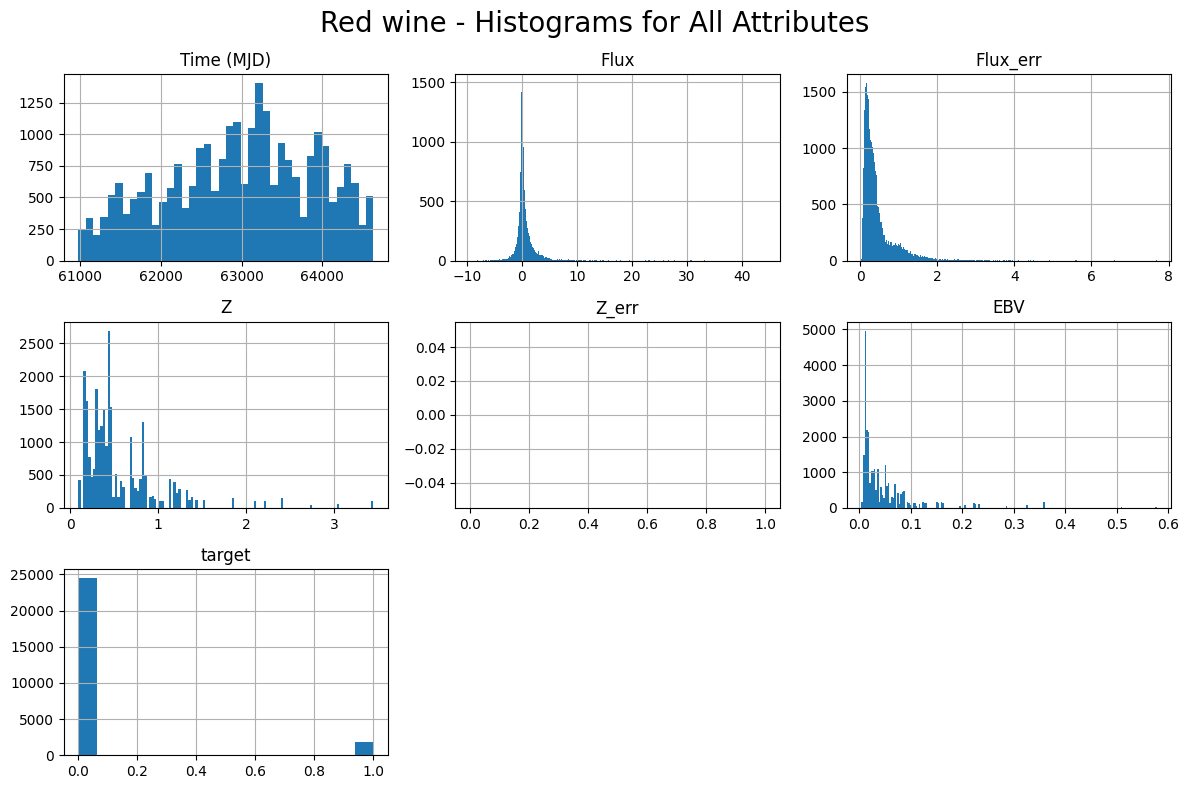

In [36]:
# data = pd.merge()
data = df.merge(log_df, on="object_id") #, drop = 'English Translation	')

# log_df
# df_split1
# data.head(10)


plt.figure(figsize=(20,10));
data.hist(bins='auto', figsize=(12,8));
plt.suptitle("Red wine - Histograms for All Attributes", fontsize=20);
plt.tight_layout();
plt.show();


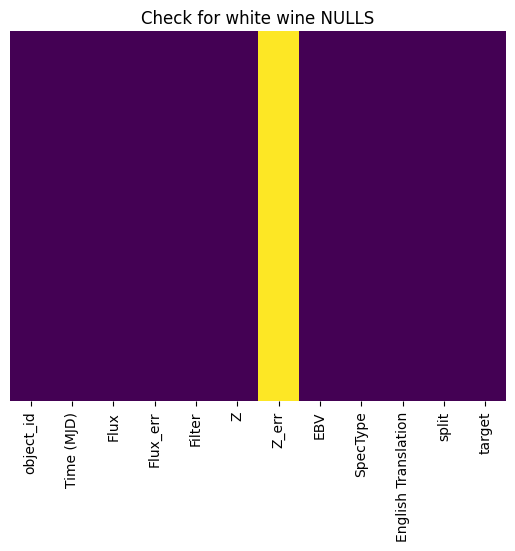

In [38]:
import seaborn as sns
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis');
plt.title("Check for white wine NULLS")
plt.show();

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets


# attributes = data[columns]
exclude = ['object_id']
attributes = [c for c in data.columns if c not in exclude]


def attribute_func(Atribute):
    plt.figure(figsize=(10, 4))
    sns.boxplot(
        color="darkred",
        data = data[Atribute]
    )
    plt.title(f"{Atribute}")
    plt.tight_layout()


widgets.interact(attribute_func, Atribute = attributes);

interactive(children=(Dropdown(description='Atribute', options=('Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z…

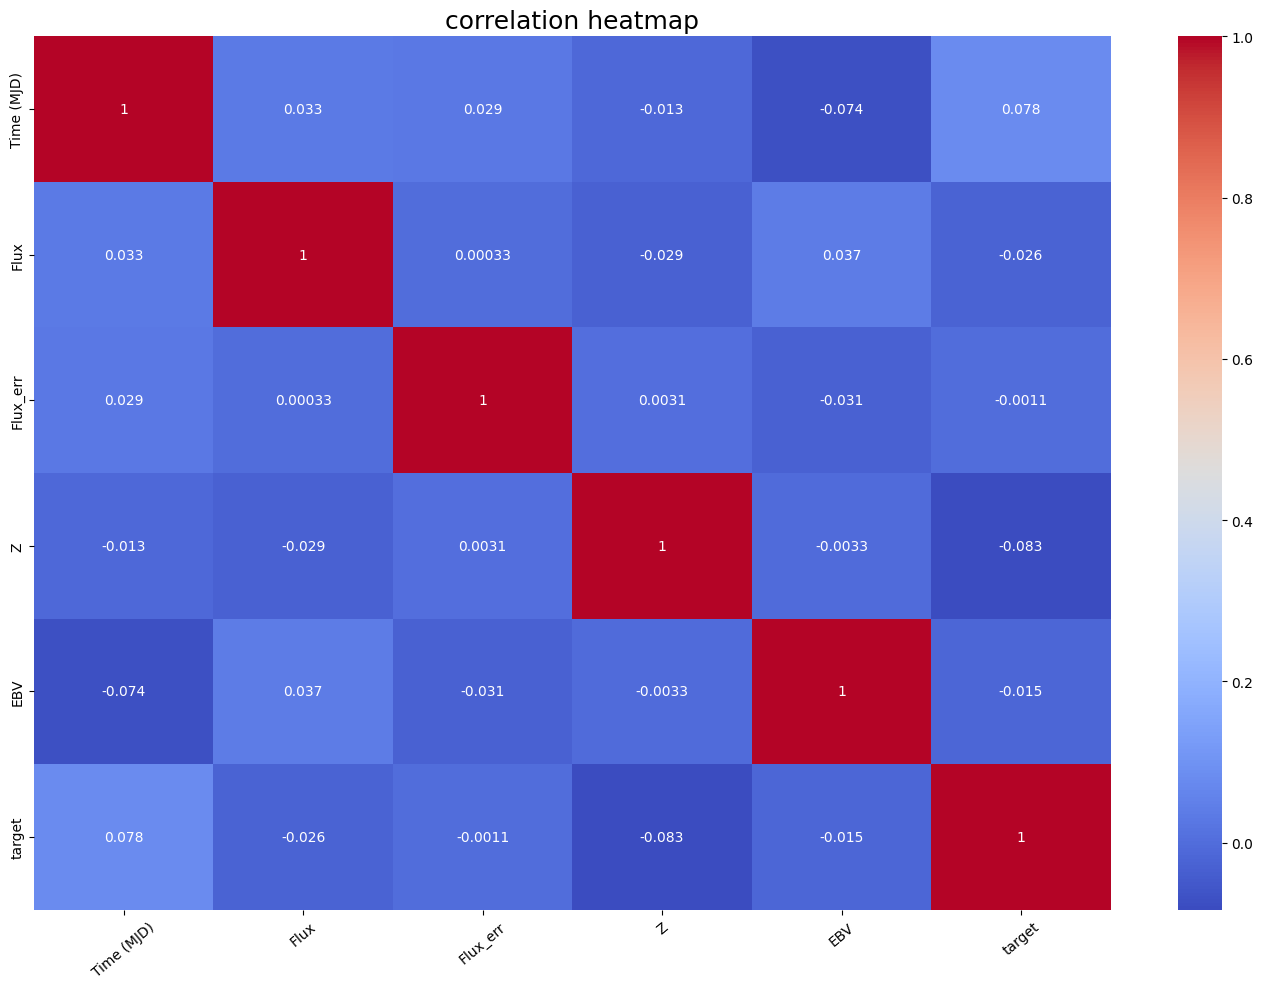

: 

In [ ]:
# Correlation check #

# data.drop(columns=['Z_err', 'English Translation', 'split'])
numeric_data = data.select_dtypes(include=['number'])
numeric_data.drop(inplace=True, columns='Z_err')
plt.figure(figsize=(14,10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation=40)
plt.title("correlation heatmap", fontsize=18)
plt.tight_layout()
plt.show()


# plt.figure(figsize=(14,10))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
# plt.xticks(rotation=40)
# plt.title("Red wine correlation heatmap", fontsize = 18)
# plt.tight_layout()
# plt.show()

In [49]:
data.target.value_counts(normalize=True)

target
0    0.931621
1    0.068379
Name: proportion, dtype: float64

In [48]:
data.columns

Index(['object_id', 'Time (MJD)', 'Flux', 'Flux_err', 'Filter', 'Z', 'Z_err',
       'EBV', 'SpecType', 'English Translation', 'split', 'target'],
      dtype='object')